In [77]:
!pip install xgboost
!pip install catboost




In [78]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree   import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
    StratifiedKFold,
    cross_validate
)
from sklearn.metrics import (
    confusion_matrix,
    f1_score,
    precision_score,
    accuracy_score,
    recall_score
)
warnings.filterwarnings('ignore')

### 1. Loading Data

In [79]:
X_train = np.load('Artifacts/X_train.npz')['arr_0']
Y_train = np.load('Artifacts/Y_train.npz')['arr_0']
X_test = np.load('Artifacts/X_test.npz')['arr_0']
Y_test = np.load('Artifacts/Y_test.npz')['arr_0']

### 2. Define Multi Model

In [80]:
models ={
    'logistic_regression': LogisticRegression(),
    'decision_tree': DecisionTreeClassifier(),
    'random_forest': RandomForestClassifier(),
    'xgboost' : XGBClassifier(),
    'catboost' : CatBoostClassifier()


    
}

### 2. Configure K-Fold CV

In [81]:
cv = StratifiedKFold(
    n_splits=6,
    random_state=42,
    shuffle=True

)

In [82]:
trained_models = {}
for model_name, model in models.items():
    print(f"\nCross Validation: {model_name}")

    cv_results = cross_validate(
        model,
        X_train,
        Y_train,
        cv=cv, scoring='f1',
        return_estimator=True,
        return_train_score=False

    )
    test_scores = cv_results['test_score']
    best_index = np.argmax(test_scores)

    estimator = cv_results['estimator'][best_index]
    trained_models[model_name] = estimator


Cross Validation: logistic_regression

Cross Validation: decision_tree

Cross Validation: random_forest

Cross Validation: xgboost

Cross Validation: catboost
Learning rate set to 0.023497
0:	learn: 0.6809784	total: 6.06ms	remaining: 6.05s
1:	learn: 0.6698438	total: 14ms	remaining: 7.01s
2:	learn: 0.6600068	total: 20.6ms	remaining: 6.85s
3:	learn: 0.6503207	total: 28.1ms	remaining: 7s
4:	learn: 0.6409509	total: 34.1ms	remaining: 6.79s
5:	learn: 0.6326021	total: 42.2ms	remaining: 7s
6:	learn: 0.6241689	total: 48.4ms	remaining: 6.86s
7:	learn: 0.6165290	total: 56.1ms	remaining: 6.95s
8:	learn: 0.6093174	total: 62.9ms	remaining: 6.93s
9:	learn: 0.6017118	total: 70.1ms	remaining: 6.94s
10:	learn: 0.5955367	total: 78.8ms	remaining: 7.08s
11:	learn: 0.5883638	total: 86.6ms	remaining: 7.13s
12:	learn: 0.5824394	total: 99.4ms	remaining: 7.55s
13:	learn: 0.5768028	total: 106ms	remaining: 7.46s
14:	learn: 0.5717916	total: 112ms	remaining: 7.36s
15:	learn: 0.5664384	total: 116ms	remaining: 7.16s

In [83]:
Y_hat_tests={}
for model_name, model in trained_models.items():
    Y_hat_test = model.predict(X_test)
    Y_hat_tests[model_name] = Y_hat_test
Y_hat_tests

{'logistic_regression': array([1, 0, 0, ..., 0, 0, 1]),
 'decision_tree': array([1, 0, 0, ..., 0, 0, 0]),
 'random_forest': array([1, 0, 0, ..., 0, 0, 0]),
 'xgboost': array([1, 0, 0, ..., 0, 0, 1]),
 'catboost': array([1, 0, 0, ..., 0, 0, 1])}

In [84]:
cm1 = confusion_matrix(Y_test, Y_hat_tests['logistic_regression'])
cm2 = confusion_matrix(Y_test, Y_hat_tests['decision_tree'])
cm3 = confusion_matrix(Y_test, Y_hat_tests['random_forest'])
cm4 = confusion_matrix(Y_test, Y_hat_tests['xgboost'])
cm5 = confusion_matrix(Y_test, Y_hat_tests['catboost'])


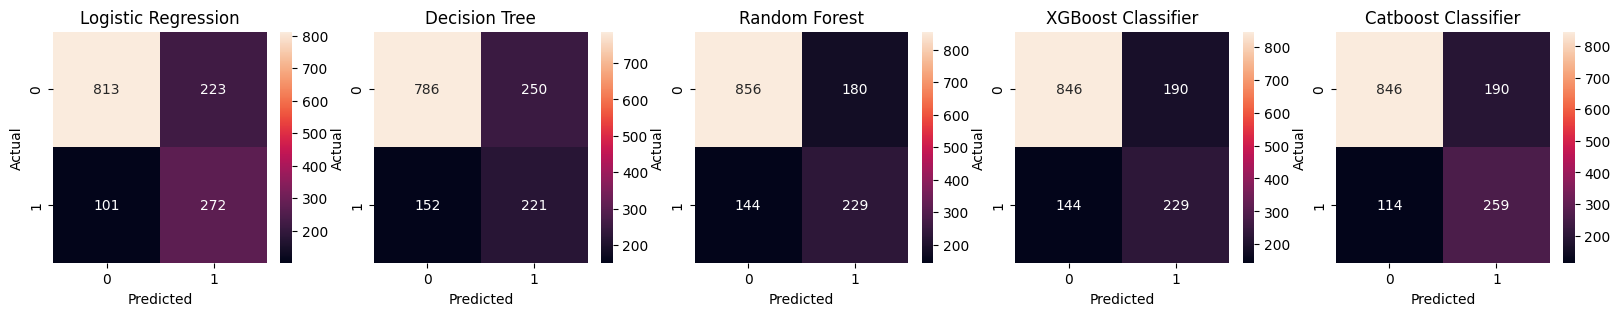

In [85]:
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize=(20,3))

sns.heatmap(cm1, annot=True, fmt='d', ax=ax1)
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')
ax1.set_title('Logistic Regression')


sns.heatmap(cm2, annot=True, fmt='d', ax=ax2)
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')
ax2.set_title('Decision Tree')


sns.heatmap(cm3, annot=True, fmt='d', ax=ax3)
ax3.set_xlabel('Predicted')
ax3.set_ylabel('Actual')
ax3.set_title('Random Forest')

sns.heatmap(cm4, annot=True, fmt='d', ax=ax4)
ax4.set_xlabel('Predicted')
ax4.set_ylabel('Actual')
ax4.set_title('XGBoost Classifier')

sns.heatmap(cm5, annot=True, fmt='d', ax=ax5)
ax5.set_xlabel('Predicted')
ax5.set_ylabel('Actual')
ax5.set_title('Catboost Classifier')

plt.show()
